# 1. Data Preprocessing

In [163]:
import pandas as pd  
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv("SeoulBikeData.csv")
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/17                254     0            -5.2           37   
1  01/12/17                204     1            -5.5           38   
2  01/12/17                173     2            -6.0           39   
3  01/12/17                107     3            -6.2           40   
4  01/12/17                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [165]:
df = df[df["Functioning Day"] == "Yes"]

# remove Functioning Day column
df = df.drop("Functioning Day", axis=1)

In [166]:
# missing values
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
dtype: int64

In [167]:
# Convert Date column to datetime of Day, Month and Year format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  
0                      0.0           0.0            0.0  Winter  No Holiday  
1                      0.0           0.0            0.0  Winter  No Holiday  
2                      0.0           0.0            0.0  Winter  No Holiday  
3                      0.0           0.0            0.0  Winter  No Holiday  
4                      0.0           0.0            0.0  Winter  No Holiday

In [168]:
# Add one more binary column which is 1 if the day is weekend and 0 if the day is weekday.
df['Day of Week'] = df['Date'].dt.day_name()
df['Weekend'] = df['Day of Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Day of Week  Weekend  
0      Friday        0  
1      Friday        0  
2      Friday        0  
3      Friday        0  
4      Friday        0

In [169]:
# Add month column
df['Month'] = df['Date'].dt.month

In [170]:
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Day of Week  Weekend  Month  
0      Friday        0     12  
1      Friday        0     12  
2      Friday        0     12  
3      Friday        0     12  
4      Friday        0     12

In [171]:
# Checkdata types
df.dtypes

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Day of Week                         object
Weekend                              int64
Month                                int32
dtype: object

#### Yes all int/float datatypes are in numerical data type

In [172]:
# separate numerical and categorical features

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [173]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend'],
      dtype='object')

In [174]:
categorical_features

Index(['Seasons', 'Holiday', 'Day of Week'], dtype='object')

# 2. Data Visualization and Encoding

### 2.1 Visualizing how rented bike count varies hourly for different categorical features.

In [175]:
# Visualizing the hourly bike rentals in different seasons
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [176]:
df_winter = df[df["Seasons"] == "Winter"]   
df_spring = df[df["Seasons"] == "Spring"]
df_summer = df[df["Seasons"] == "Summer"]
df_autumn = df[df["Seasons"] == "Autumn"]

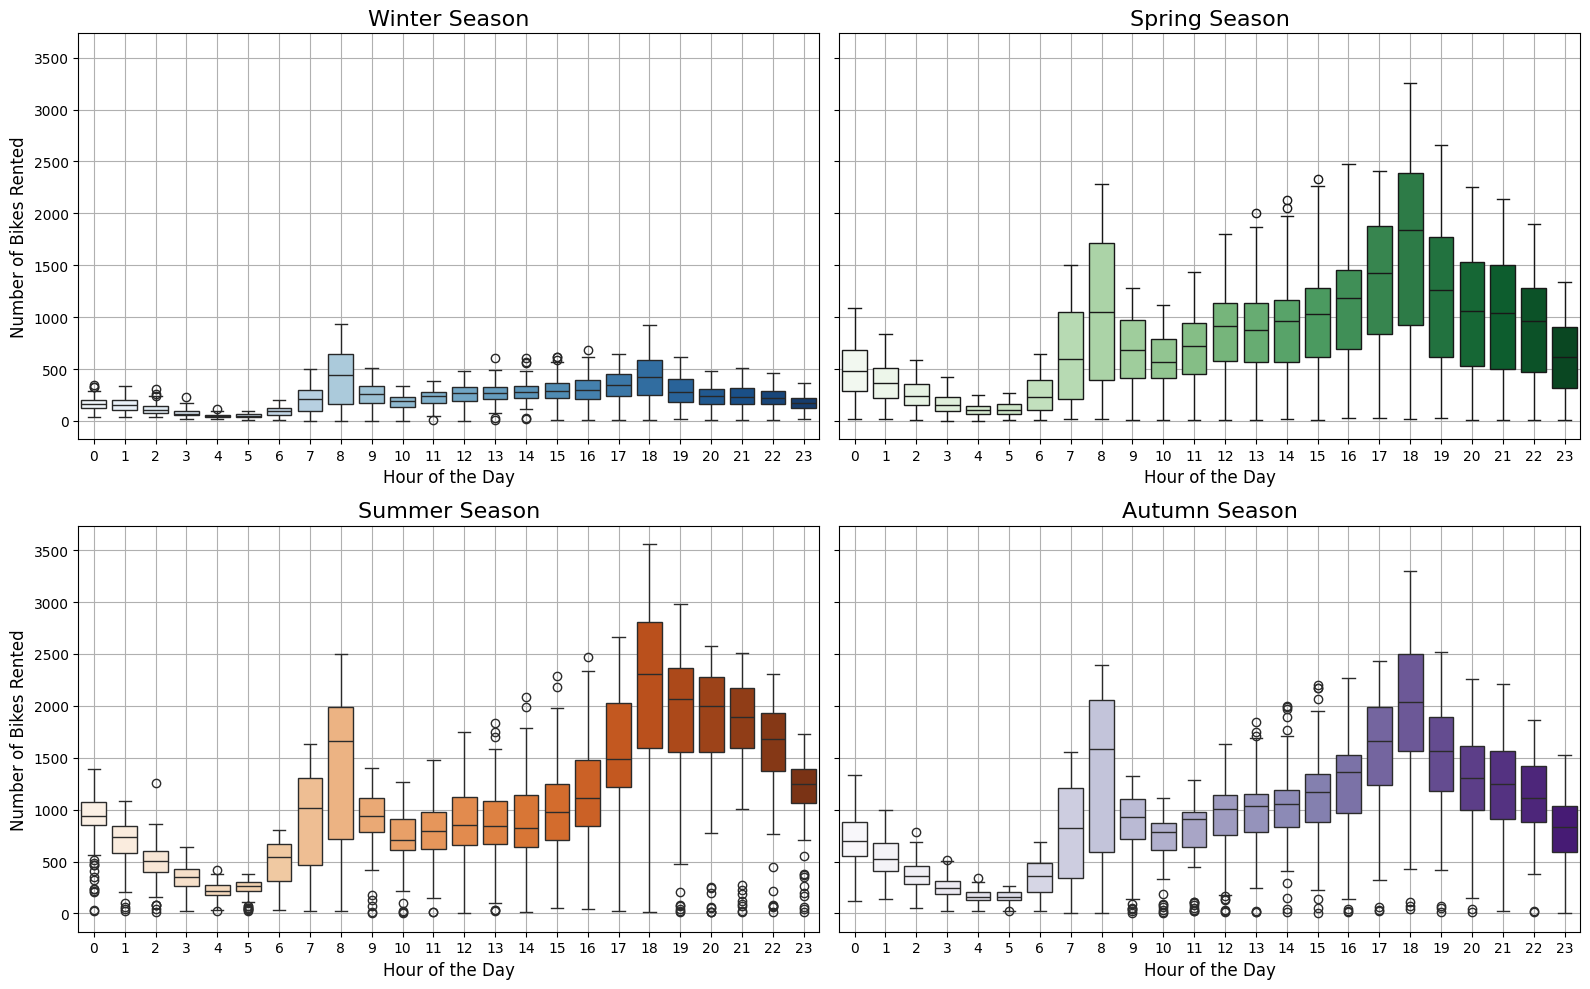

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Plot for Winter
sns.boxplot(x='Hour', y='Rented Bike Count', data=df_winter, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Winter Season', fontsize=16)
axes[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0, 0].grid(True)

# Plot for Spring
sns.boxplot(x='Hour', y='Rented Bike Count', data=df_spring, palette='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Spring Season', fontsize=16)
axes[0, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 1].grid(True)

# Plot for Summer
sns.boxplot(x='Hour', y='Rented Bike Count', data=df_summer, palette='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Summer Season', fontsize=16)
axes[1, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[1, 0].grid(True)

# Plot for Autumn
sns.boxplot(x='Hour', y='Rented Bike Count', data=df_autumn, palette='Purples', ax=axes[1, 1])
axes[1, 1].set_title('Autumn Season', fontsize=16)
axes[1, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


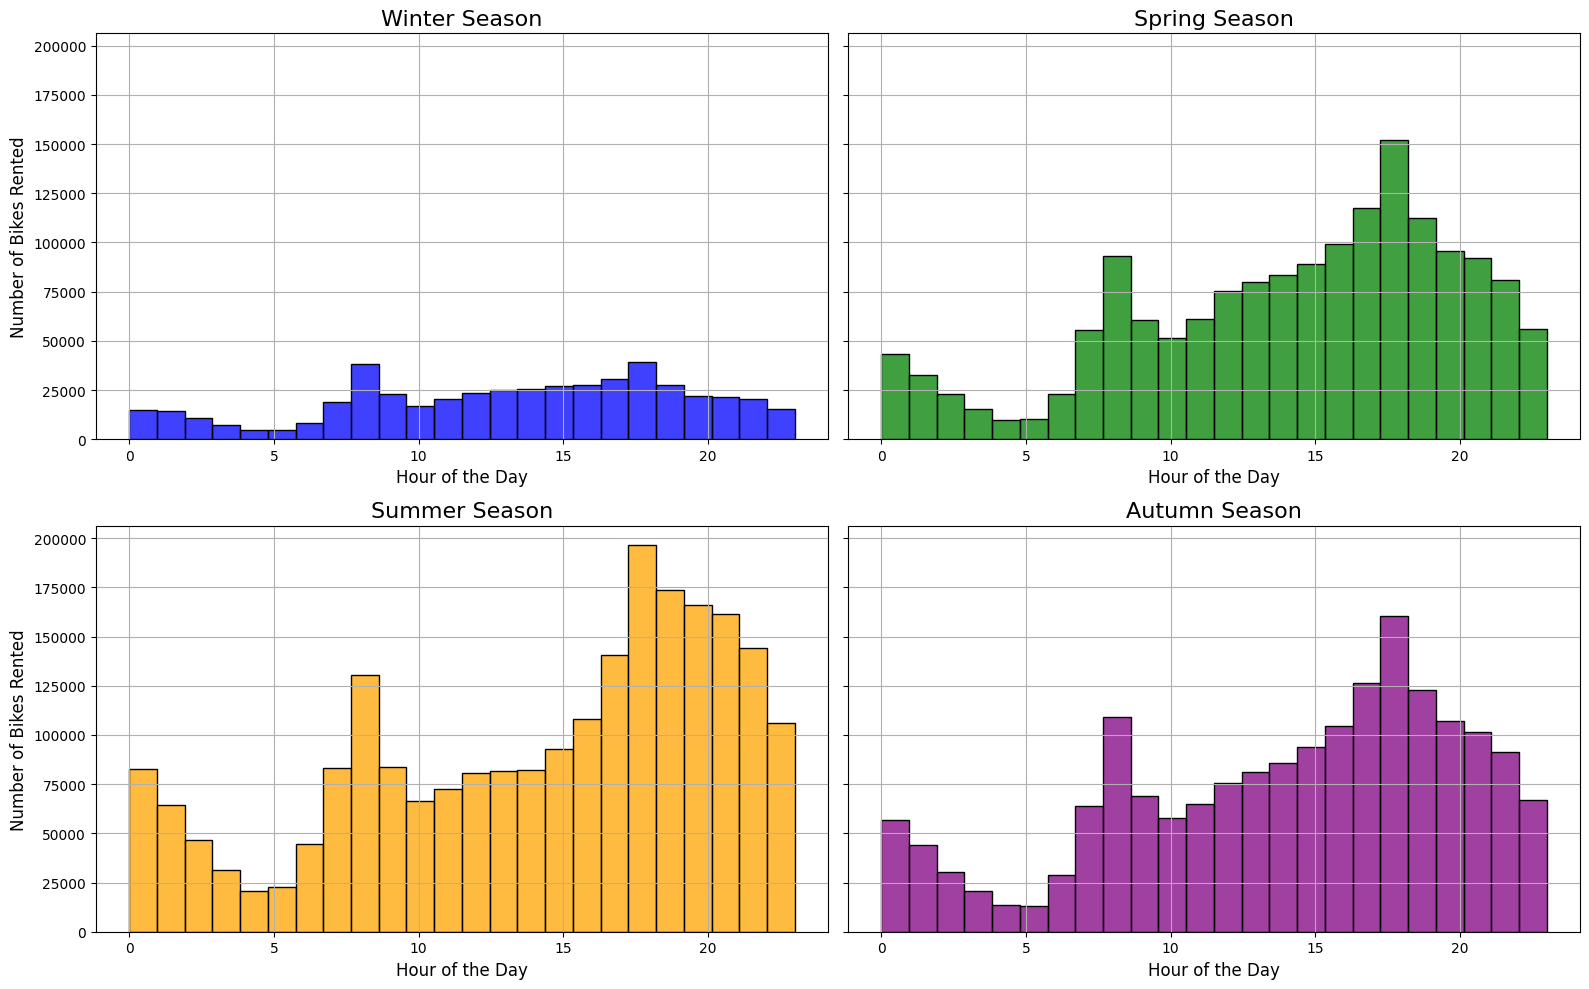

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Histogram for Winter
sns.histplot(df_winter, x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Winter Season', fontsize=16)
axes[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0, 0].grid(True)

# Histogram for Spring
sns.histplot(df_spring, x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Spring Season', fontsize=16)
axes[0, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 1].grid(True)

# Histogram for Summer
sns.histplot(df_summer, x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Summer Season', fontsize=16)
axes[1, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[1, 0].grid(True)

# Histogram for Autumn
sns.histplot(df_autumn, x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Autumn Season', fontsize=16)
axes[1, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [179]:
#print total number of bike rentals in each season
print("Total number of bike rentals in each season:")
print("Winter:", df_winter["Rented Bike Count"].sum())
print("Spring:", df_spring["Rented Bike Count"].sum())
print("Summer:", df_summer["Rented Bike Count"].sum())
print("Autumn:", df_autumn["Rented Bike Count"].sum())

Total number of bike rentals in each season:
Winter: 487169
Spring: 1611909
Summer: 2283234
Autumn: 1790002


In [180]:
df["Holiday"].value_counts()

Holiday
No Holiday    8057
Holiday        408
Name: count, dtype: int64

In [181]:
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Day of Week  Weekend  Month  
0      Friday        0     12  
1      Friday        0     12  
2      Friday        0     12  
3      Friday        0     12  
4      Friday        0     12

In [182]:
df["Holiday"].unique()   

array(['No Holiday', 'Holiday'], dtype=object)

In [183]:
df_holiday = df[df["Holiday"] == "Holiday"]
df_non_holiday = df[df["Holiday"] == "No Holiday"]

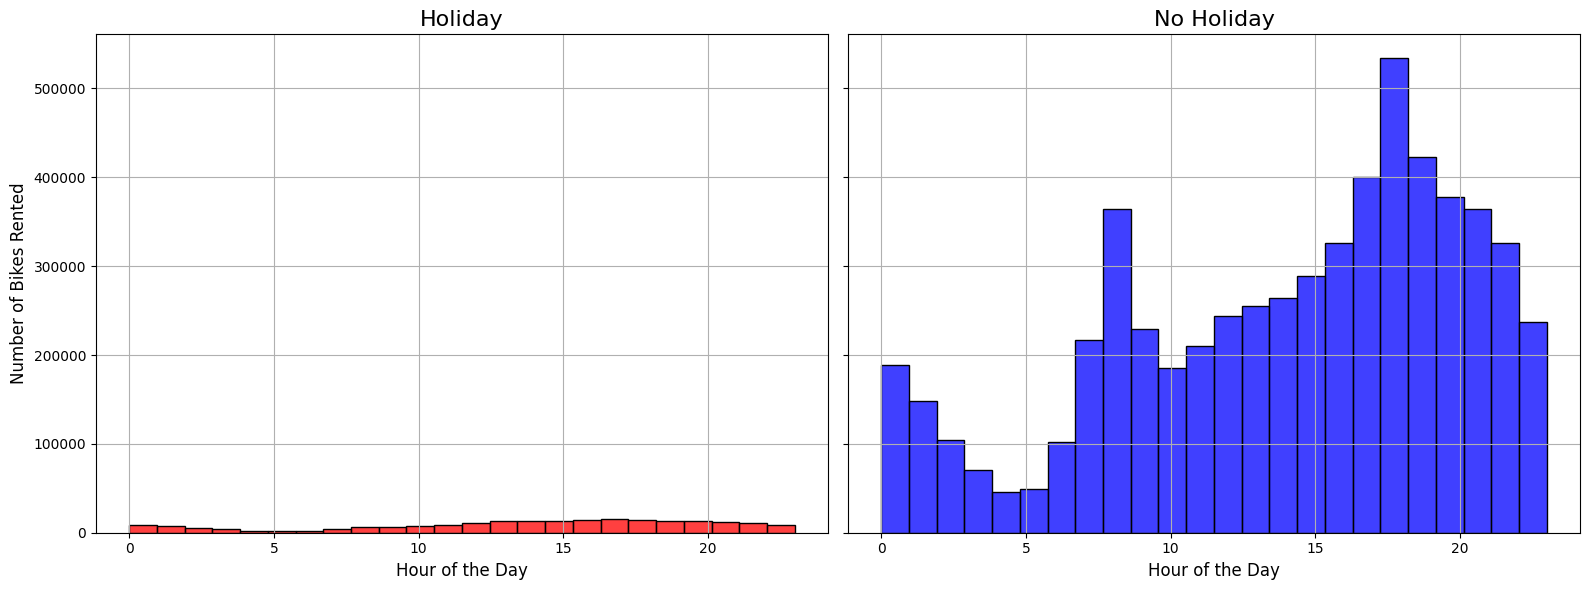

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Histogram for Holidays
sns.histplot(df_holiday, x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='red', ax=axes[0])
axes[0].set_title('Holiday', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0].grid(True)

# Histogram for Non-Holidays
sns.histplot(df_non_holiday, x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[1])
axes[1].set_title('No Holiday', fontsize=16)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


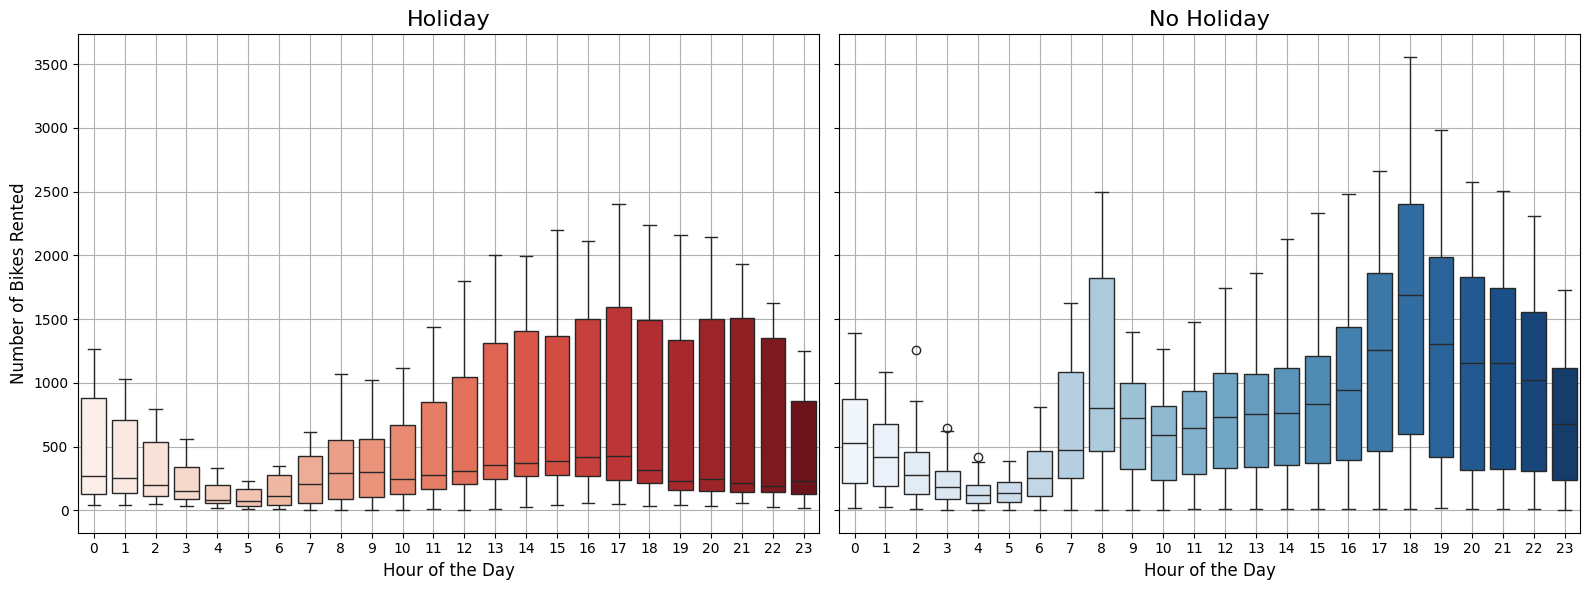

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Box plot for Holidays
sns.boxplot(x='Hour', y='Rented Bike Count', data=df_holiday, palette='Reds', ax=axes[0])
axes[0].set_title('Holiday', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0].grid(True)

# Box plot for Non-Holidays
sns.boxplot(x='Hour', y='Rented Bike Count', data=df_non_holiday, palette='Blues', ax=axes[1])
axes[1].set_title('No Holiday', fontsize=16)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


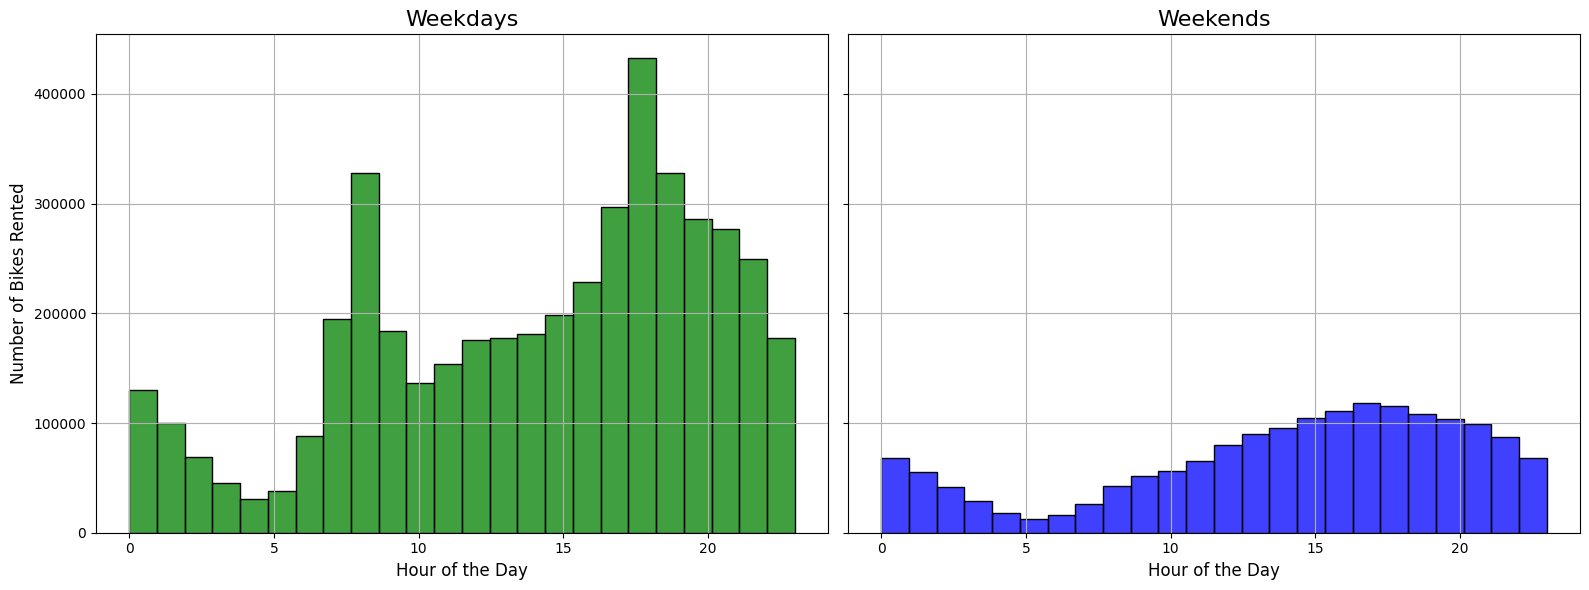

In [186]:
# Visualizing the hourly bike rentals on weekdays and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
        
# Histogram for Weekdays
sns.histplot(df[df['Weekend'] == 0], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='green', ax=axes[0])
axes[0].set_title('Weekdays', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0].grid(True)

# Histogram for Weekends
sns.histplot(df[df['Weekend'] == 1], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[1])
axes[1].set_title('Weekends', fontsize=16)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

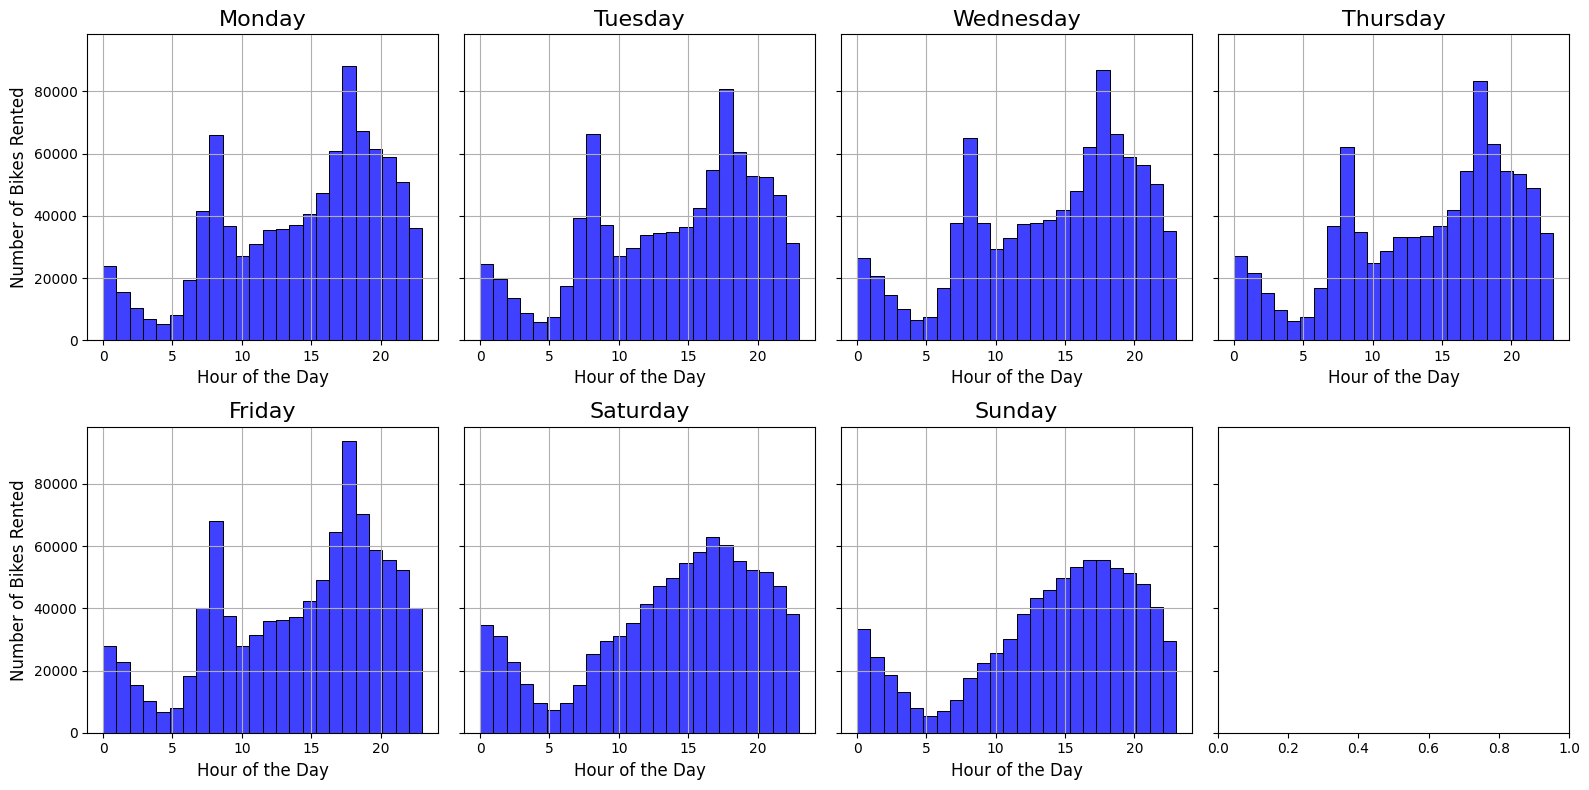

In [187]:
# Visualizing the hourly bike rentals on different days
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axes = plt.subplots(2,4, figsize=(16, 8), sharey=True)

# Plot for Monday
sns.histplot(df[df['Day of Week'] == 'Monday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Monday', fontsize=16)
axes[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0, 0].grid(True)


# Plot for Tuesday
sns.histplot(df[df['Day of Week'] == 'Tuesday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Tuesday', fontsize=16)
axes[0, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 1].grid(True)

# Plot for Wednesday
sns.histplot(df[df['Day of Week'] == 'Wednesday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[0, 2])
axes[0, 2].set_title('Wednesday', fontsize=16)
axes[0, 2].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 2].grid(True)

# Plot for Thursday
sns.histplot(df[df['Day of Week'] == 'Thursday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[0, 3])
axes[0, 3].set_title('Thursday', fontsize=16)
axes[0, 3].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 3].grid(True)

# Plot for Friday
sns.histplot(df[df['Day of Week'] == 'Friday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Friday', fontsize=16)
axes[1, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[1, 0].grid(True)

# Plot for Saturday
sns.histplot(df[df['Day of Week'] == 'Saturday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Saturday', fontsize=16)
axes[1, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 1].grid(True)

# Plot for Sunday
sns.histplot(df[df['Day of Week'] == 'Sunday'], x='Hour', weights='Rented Bike Count', bins=24, kde=False, color='blue', ax=axes[1, 2])
axes[1, 2].set_title('Sunday', fontsize=16)
axes[1, 2].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 2].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

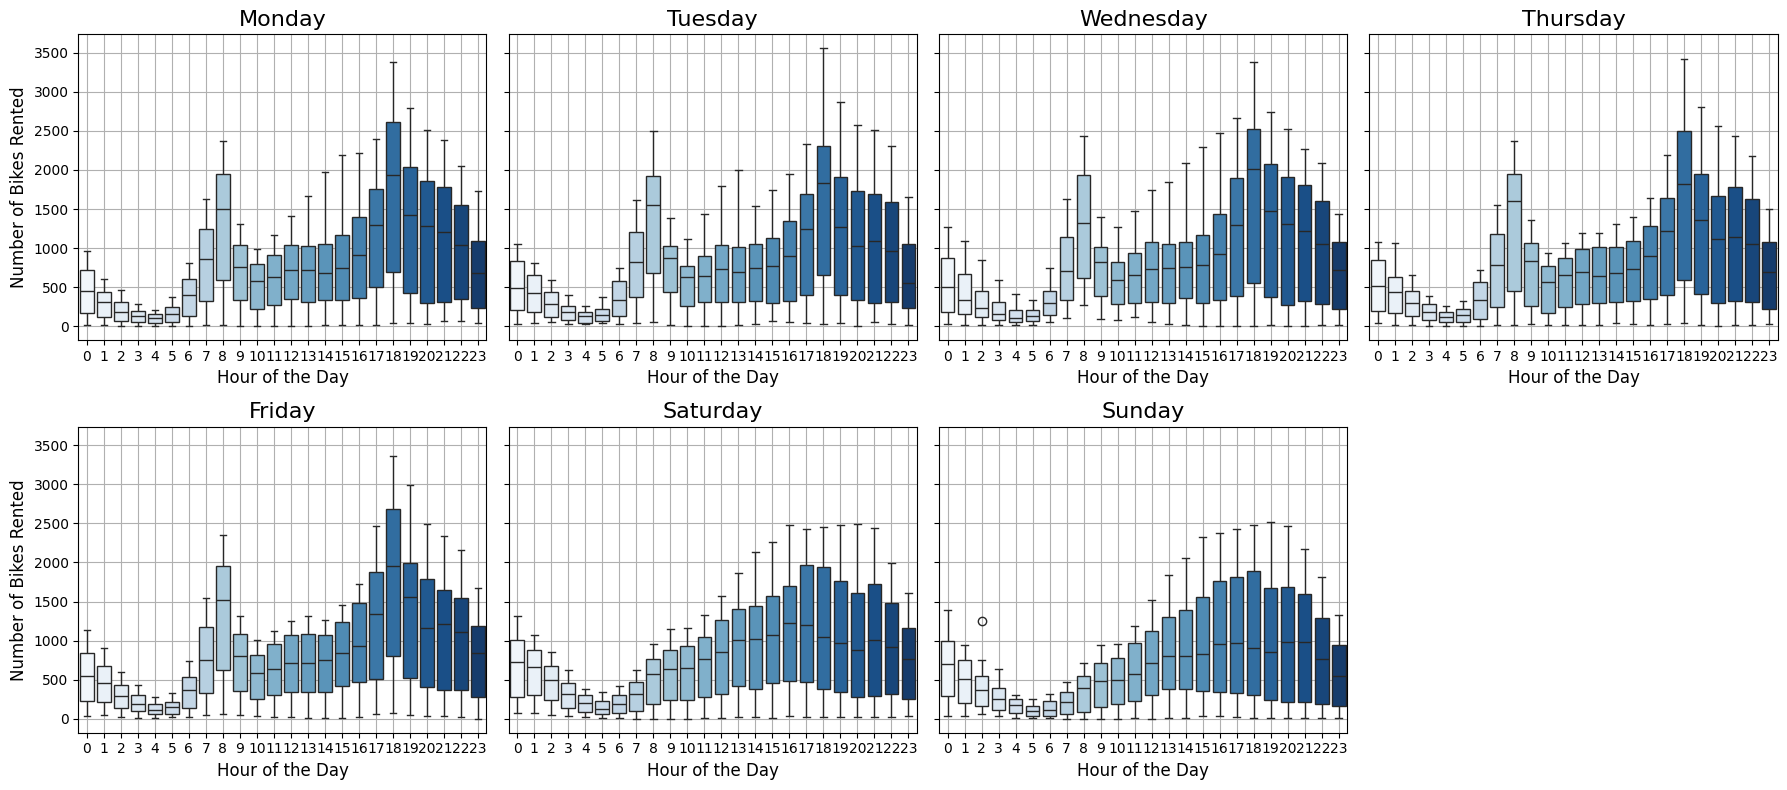

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharey=True)

# Plot for Monday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Monday'], palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Monday', fontsize=16)
axes[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[0, 0].grid(True)

# Plot for Tuesday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Tuesday'], palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Tuesday', fontsize=16)
axes[0, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 1].grid(True)

# Plot for Wednesday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Wednesday'], palette='Blues', ax=axes[0, 2])
axes[0, 2].set_title('Wednesday', fontsize=16)
axes[0, 2].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 2].grid(True)

# Plot for Thursday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Thursday'], palette='Blues', ax=axes[0, 3])
axes[0, 3].set_title('Thursday', fontsize=16)
axes[0, 3].set_xlabel('Hour of the Day', fontsize=12)
axes[0, 3].grid(True)

# Plot for Friday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Friday'], palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Friday', fontsize=16)
axes[1, 0].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 0].set_ylabel('Number of Bikes Rented', fontsize=12)
axes[1, 0].grid(True)

# Plot for Saturday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Saturday'], palette='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Saturday', fontsize=16)
axes[1, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 1].grid(True)

# Plot for Sunday
sns.boxplot(x='Hour', y='Rented Bike Count', data=df[df['Day of Week'] == 'Sunday'], palette='Blues', ax=axes[1, 2])
axes[1, 2].set_title('Sunday', fontsize=16)
axes[1, 2].set_xlabel('Hour of the Day', fontsize=12)
axes[1, 2].grid(True)

# Remove empty subplot
axes[1, 3].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [192]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend'],
      dtype='object')

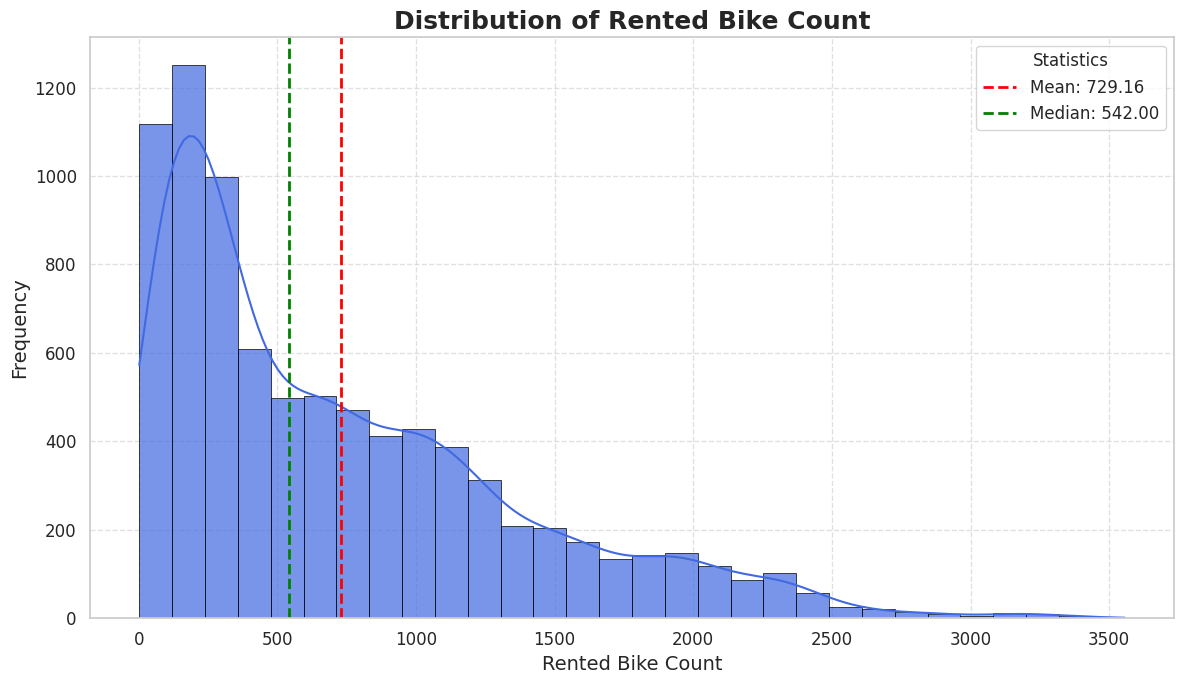

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Rented Bike Count'], kde=True, color='royalblue', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Rented Bike Count'].mean()
median_value = df['Rented Bike Count'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Rented Bike Count', fontsize=18, fontweight='bold')
plt.xlabel('Rented Bike Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


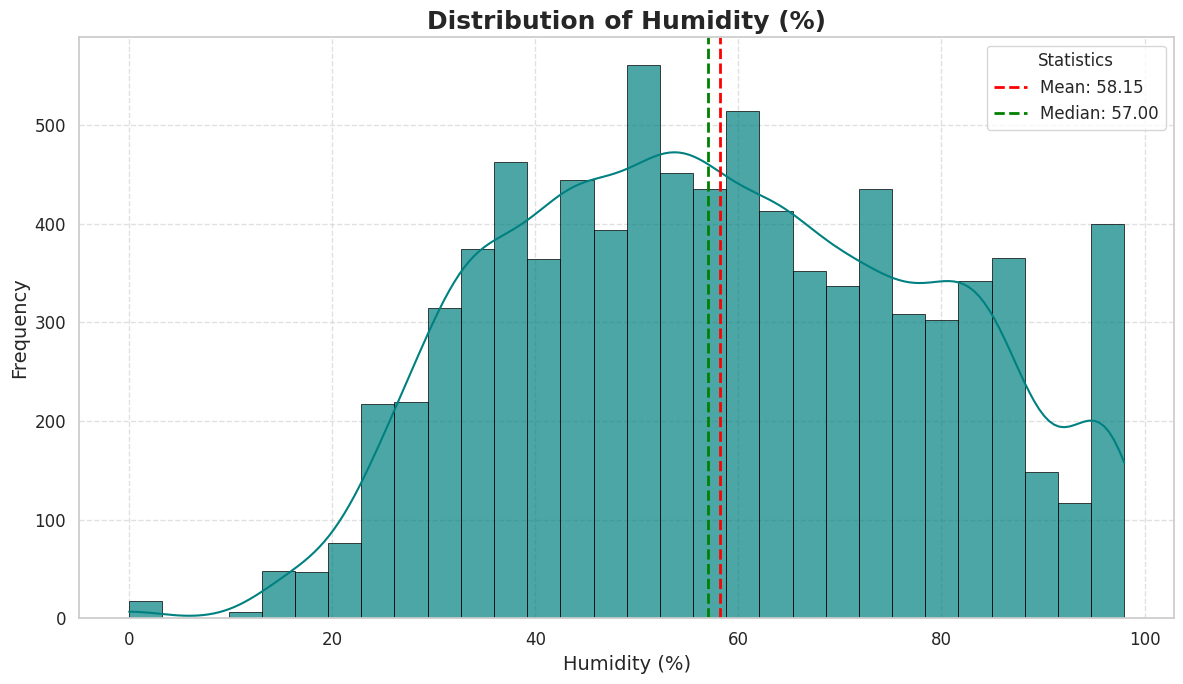

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Humidity(%)'], kde=True, color='teal', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Humidity(%)'].mean()
median_value = df['Humidity(%)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Humidity (%)', fontsize=18, fontweight='bold')
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


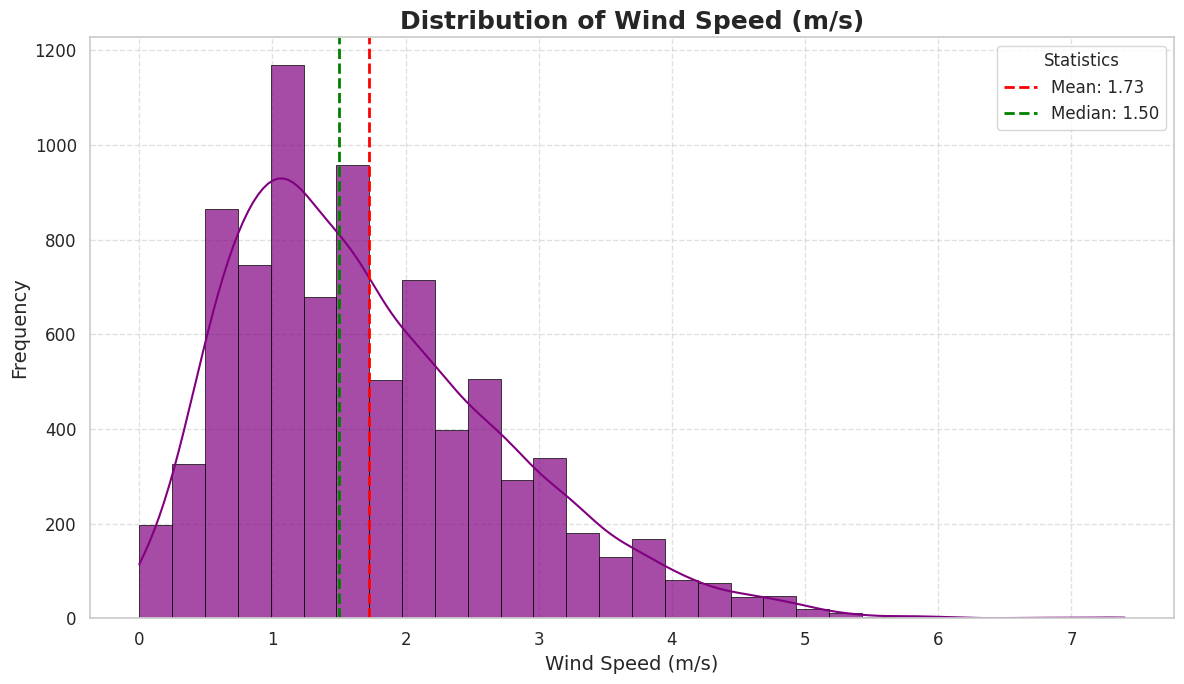

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Wind speed (m/s)'], kde=True, color='purple', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Wind speed (m/s)'].mean()
median_value = df['Wind speed (m/s)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Wind Speed (m/s)', fontsize=18, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


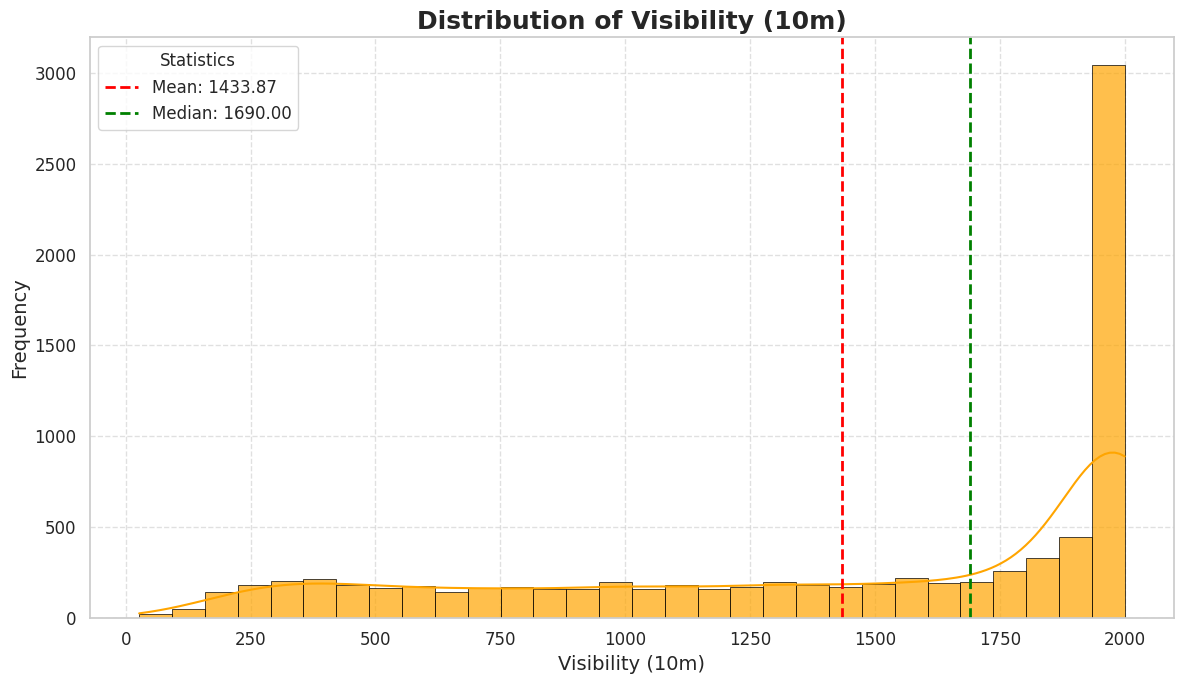

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Visibility (10m)'], kde=True, color='orange', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Visibility (10m)'].mean()
median_value = df['Visibility (10m)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Visibility (10m)', fontsize=18, fontweight='bold')
plt.xlabel('Visibility (10m)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


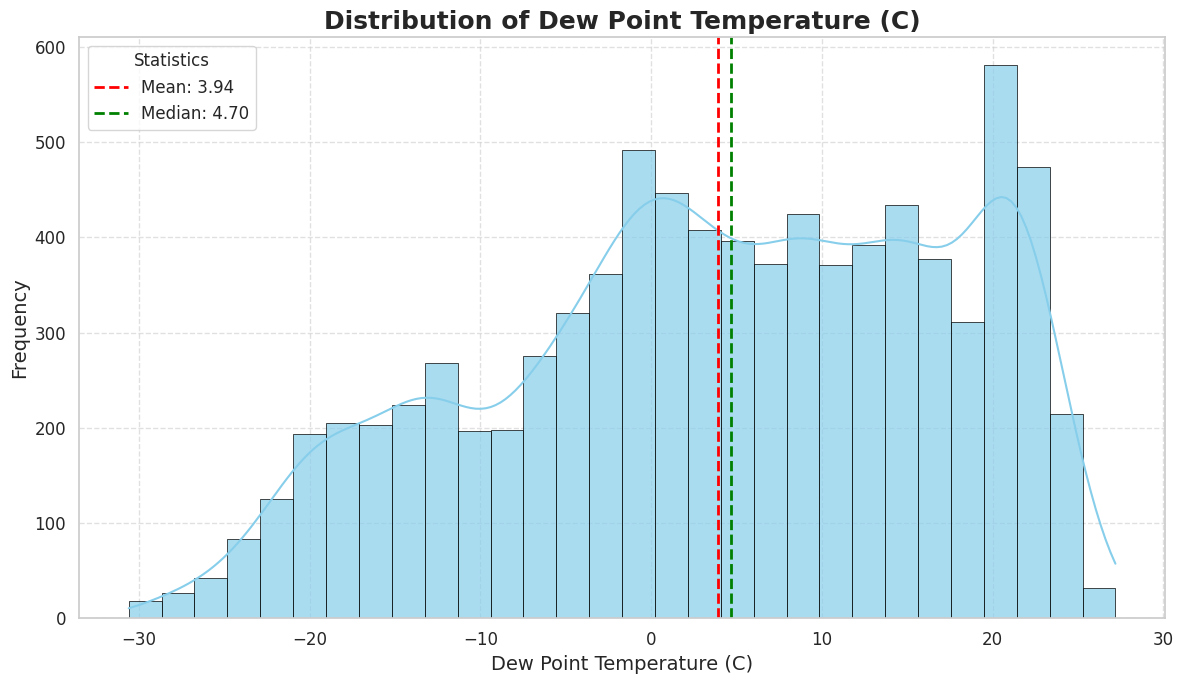

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Dew point temperature(C)'], kde=True, color='skyblue', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Dew point temperature(C)'].mean()
median_value = df['Dew point temperature(C)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Dew Point Temperature (C)', fontsize=18, fontweight='bold')
plt.xlabel('Dew Point Temperature (C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


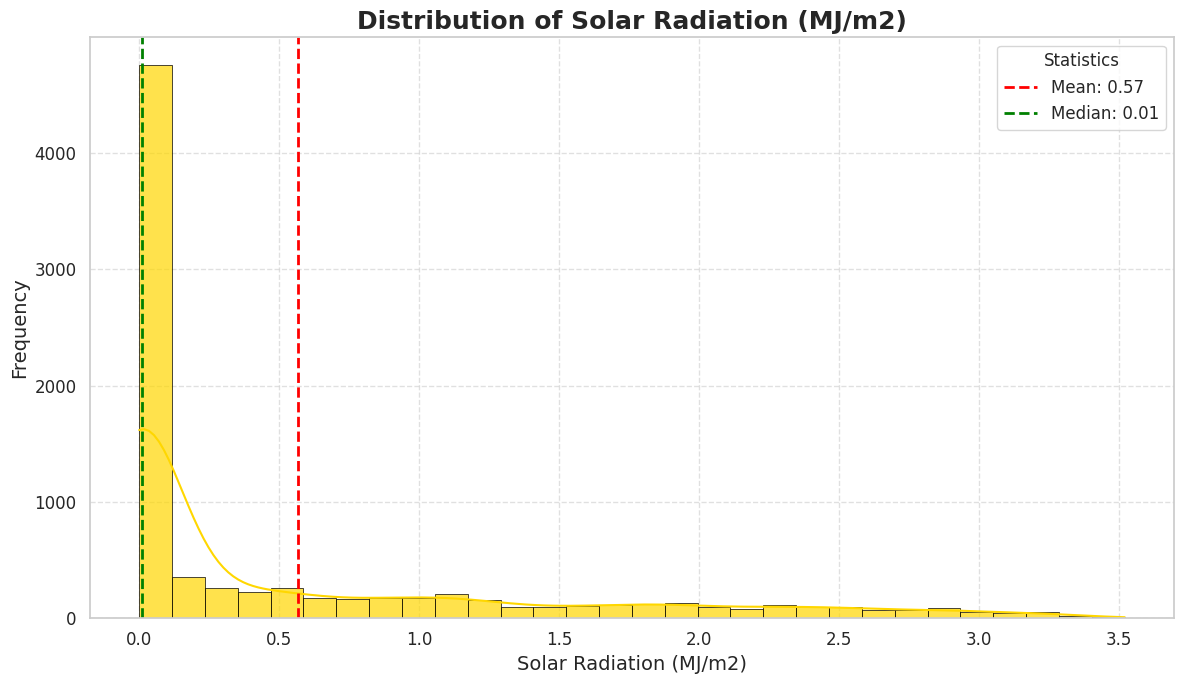

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Solar Radiation (MJ/m2)'], kde=True, color='gold', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Solar Radiation (MJ/m2)'].mean()
median_value = df['Solar Radiation (MJ/m2)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Solar Radiation (MJ/m2)', fontsize=18, fontweight='bold')
plt.xlabel('Solar Radiation (MJ/m2)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


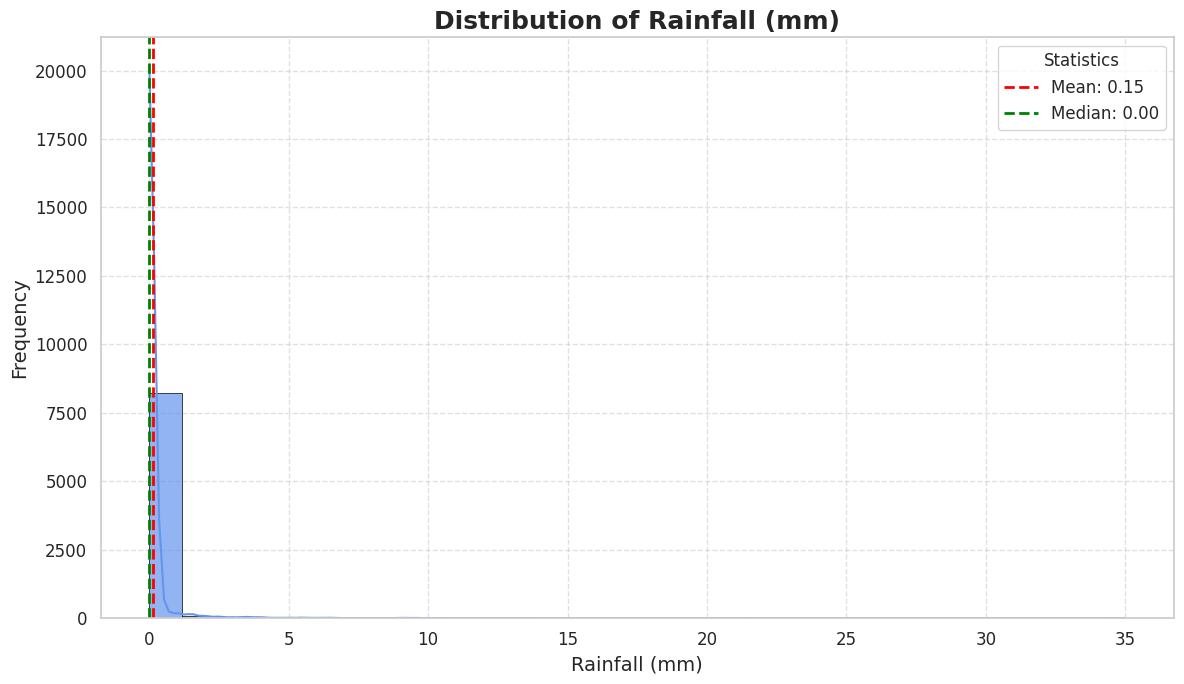

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Rainfall(mm)'], kde=True, color='cornflowerblue', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Rainfall(mm)'].mean()
median_value = df['Rainfall(mm)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Rainfall (mm)', fontsize=18, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


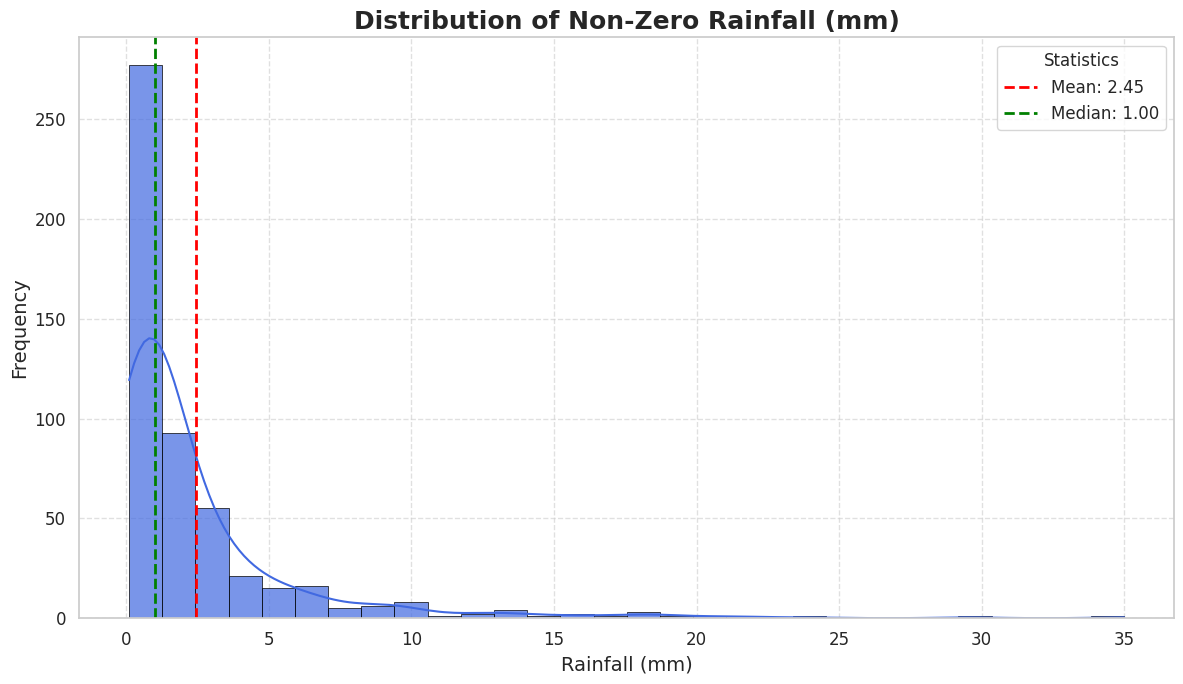

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only non-zero rainfall values
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df_non_zero_rainfall['Rainfall(mm)'], kde=True, color='royalblue', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df_non_zero_rainfall['Rainfall(mm)'].mean()
median_value = df_non_zero_rainfall['Rainfall(mm)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Non-Zero Rainfall (mm)', fontsize=18, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


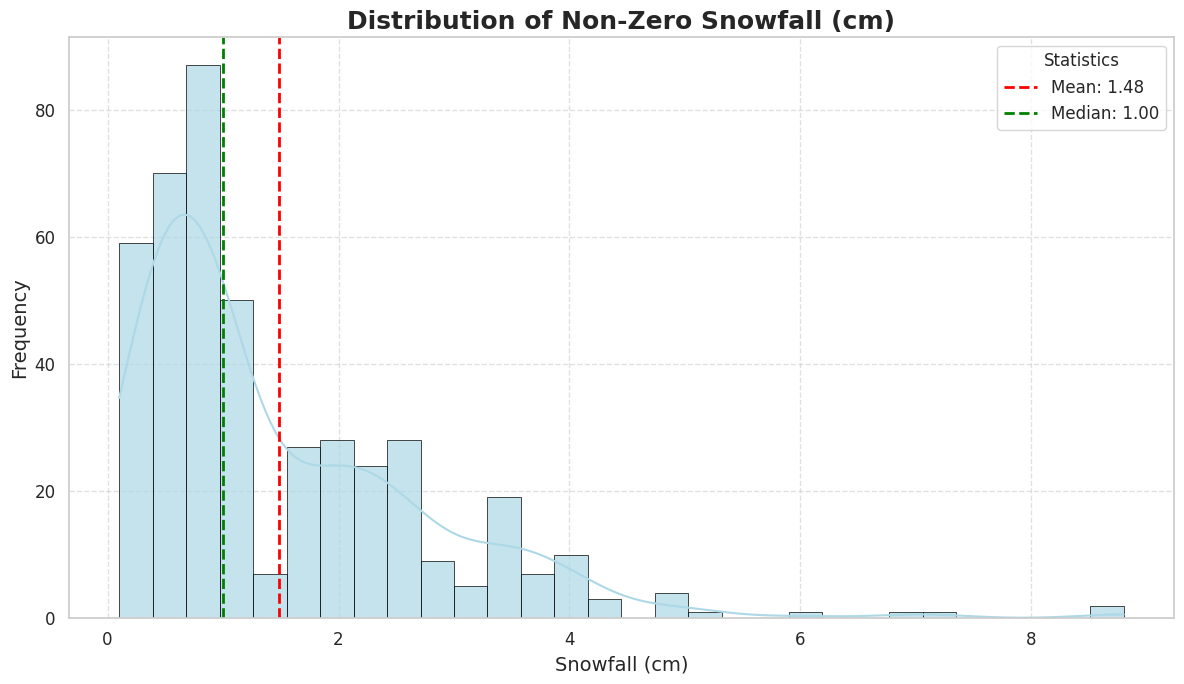

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only non-zero snowfall values
df_non_zero_snowfall = df[df['Snowfall (cm)'] > 0]

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df_non_zero_snowfall['Snowfall (cm)'], kde=True, color='lightblue', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df_non_zero_snowfall['Snowfall (cm)'].mean()
median_value = df_non_zero_snowfall['Snowfall (cm)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Non-Zero Snowfall (cm)', fontsize=18, fontweight='bold')
plt.xlabel('Snowfall (cm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


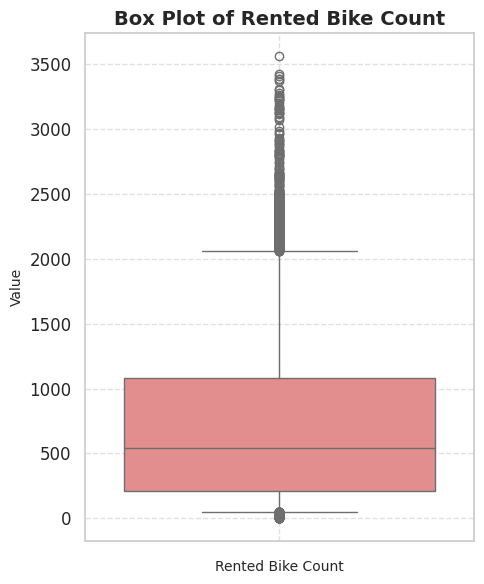

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Rented Bike Count"
sns.boxplot(data=df['Rented Bike Count'], color='lightcoral', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Rented Bike Count', fontsize=14, fontweight='bold')
plt.xlabel('Rented Bike Count', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


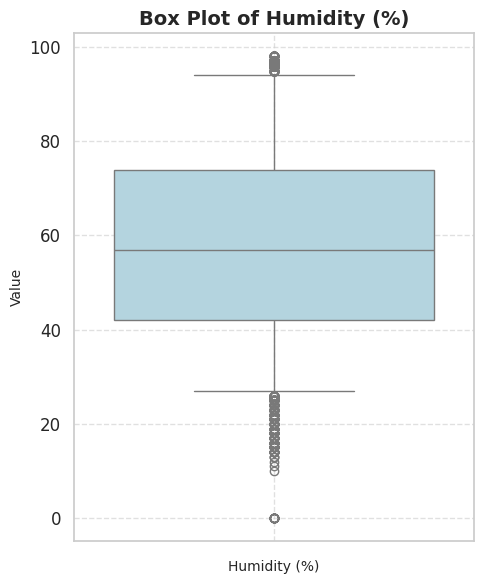

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Humidity(%)"
sns.boxplot(data=df['Humidity(%)'], color='lightblue', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Humidity (%)', fontsize=14, fontweight='bold')
plt.xlabel('Humidity (%)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


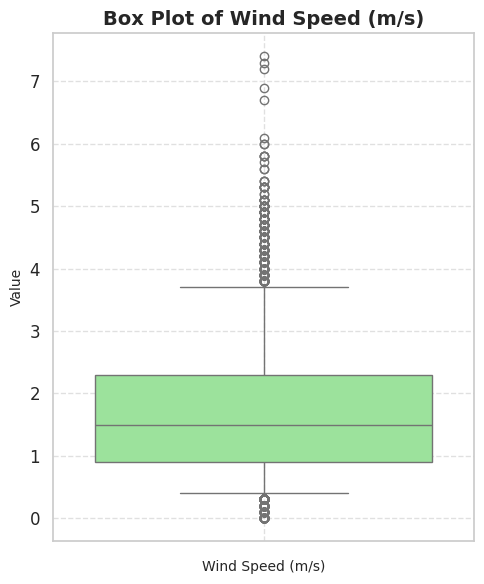

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Wind speed (m/s)"
sns.boxplot(data=df['Wind speed (m/s)'], color='lightgreen', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Wind Speed (m/s)', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


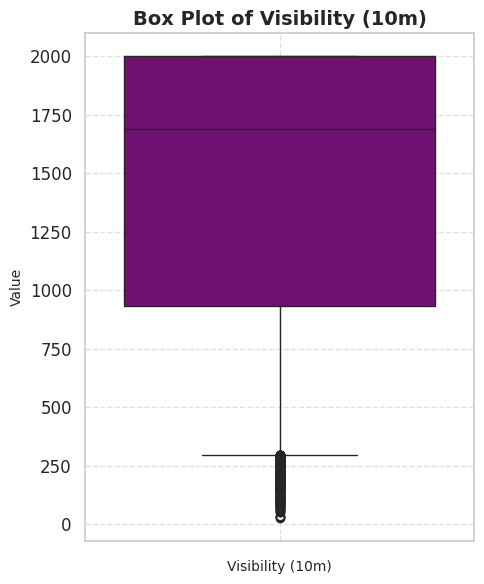

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Visibility (10m)"
sns.boxplot(data=df['Visibility (10m)'], color='purple', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Visibility (10m)', fontsize=14, fontweight='bold')
plt.xlabel('Visibility (10m)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


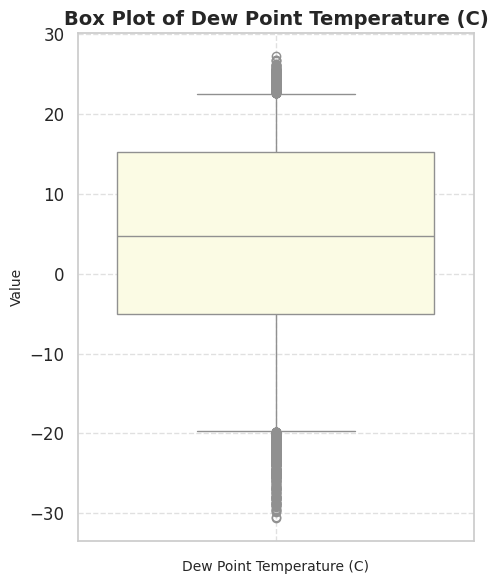

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Dew point temperature(C)"
sns.boxplot(data=df['Dew point temperature(C)'], color='lightyellow', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Dew Point Temperature (C)', fontsize=14, fontweight='bold')
plt.xlabel('Dew Point Temperature (C)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()



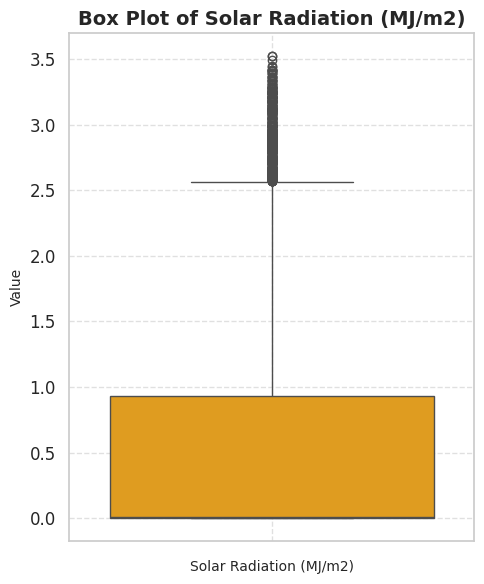

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Solar Radiation (MJ/m2)"
sns.boxplot(data=df['Solar Radiation (MJ/m2)'], color='orange', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Solar Radiation (MJ/m2)', fontsize=14, fontweight='bold')
plt.xlabel('Solar Radiation (MJ/m2)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


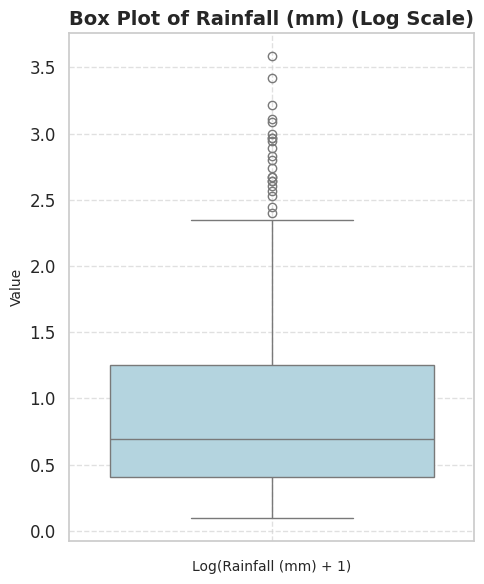

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Rainfall(mm)" with log scale
sns.boxplot(data=df[df['Rainfall(mm)'] > 0]['Rainfall(mm)'].apply(lambda x: np.log1p(x)), color='lightblue', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Rainfall (mm) (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Log(Rainfall (mm) + 1)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


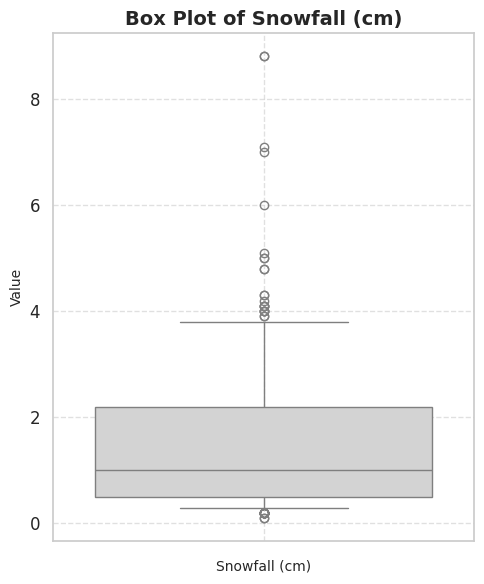

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(5, 6))

# Plot the box plot for "Snowfall (cm)" excluding zeros
sns.boxplot(data=df[df['Snowfall (cm)'] > 0]['Snowfall (cm)'], color='lightgrey', whis=[5, 95])

# Add titles and labels
plt.title('Box Plot of Snowfall (cm)', fontsize=14, fontweight='bold')
plt.xlabel('Snowfall (cm)', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


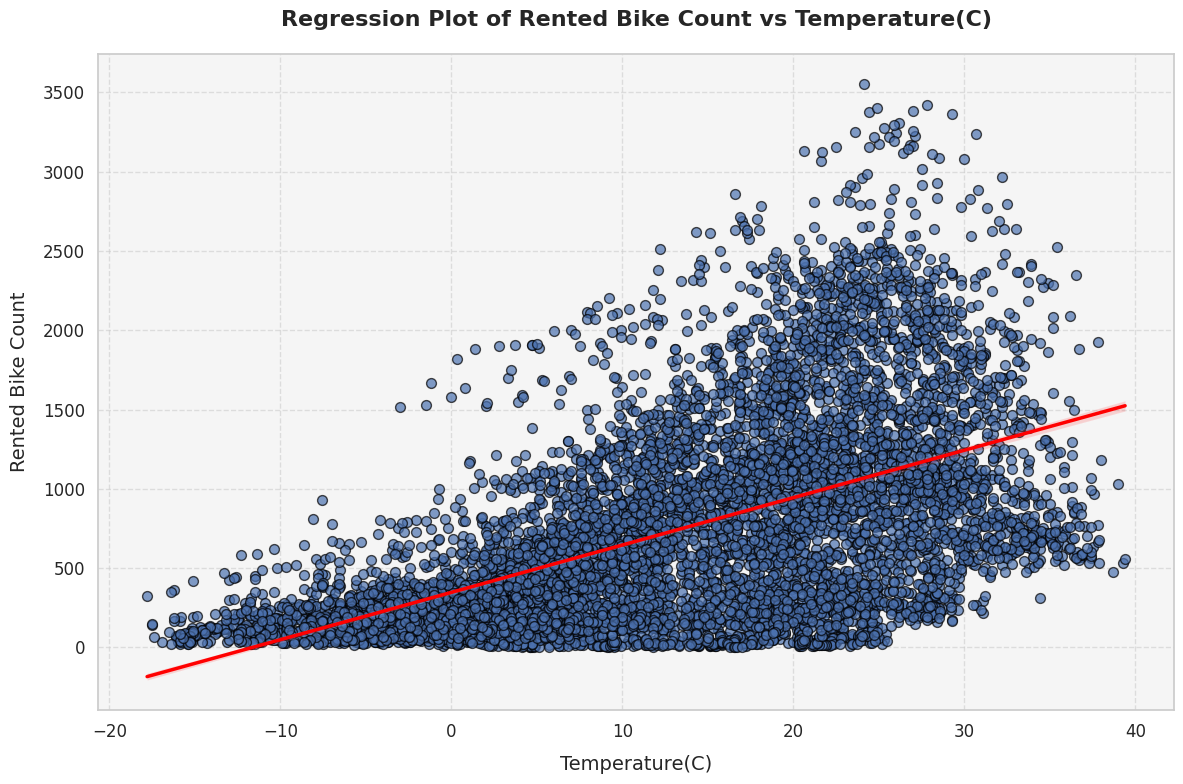

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the regression plot for the first numerical feature
first_feature = 'Temperature(C)'  # Example feature, adjust as needed
sns.regplot(
    data=df, 
    x=first_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Enhance scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {first_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(first_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


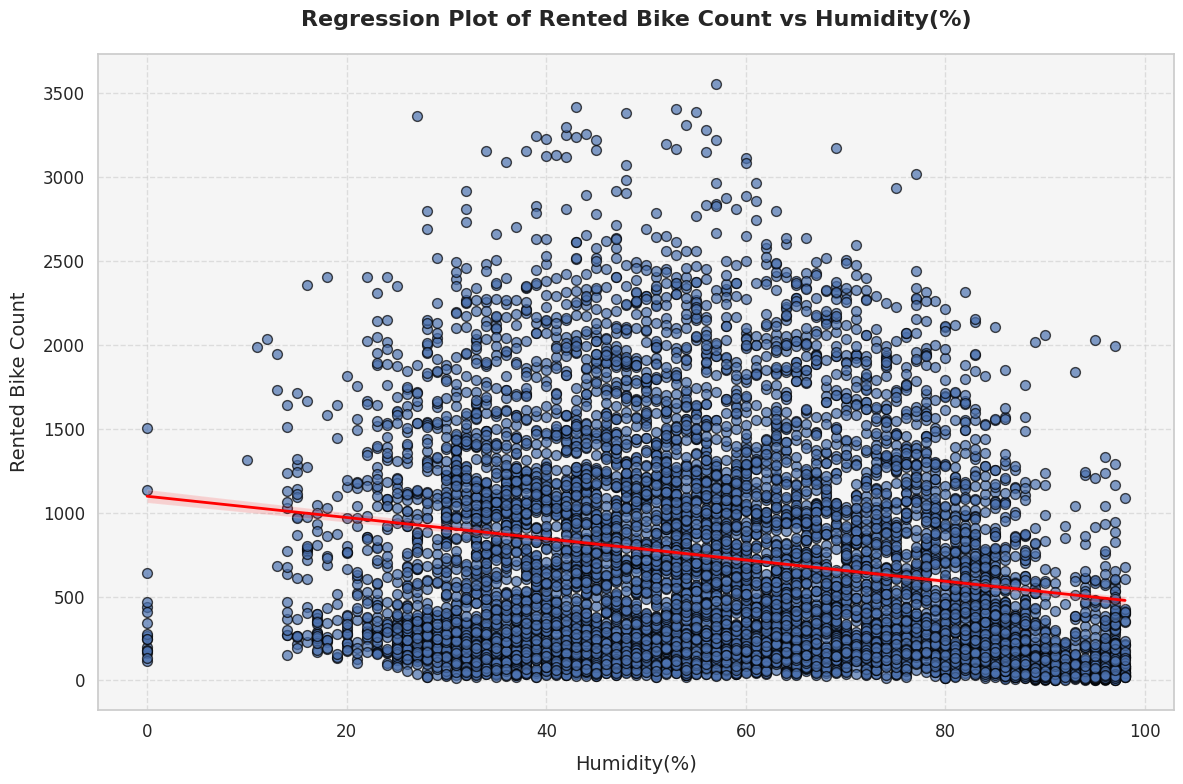

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Humidity(%)'  # Example feature, adjust as needed
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Enhance scatter points
    line_kws={'color':'red', 'linewidth':2}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


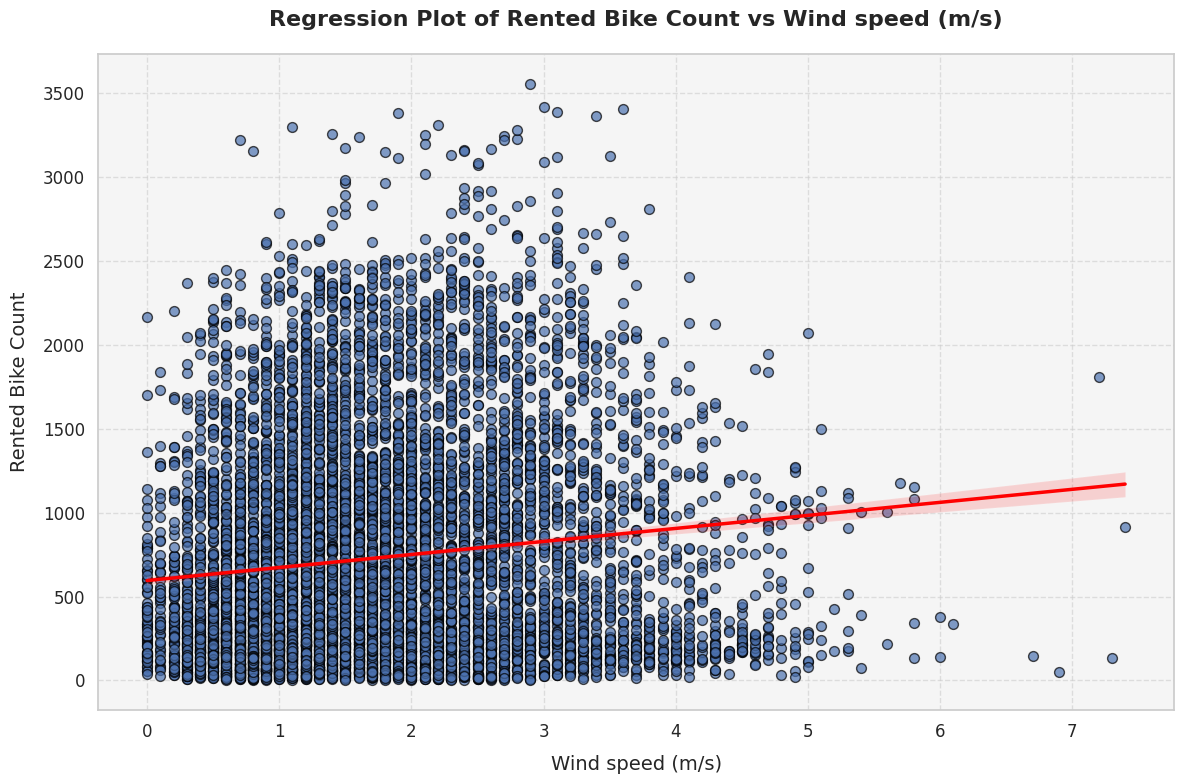

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Wind speed (m/s)'  # Example feature, adjust as needed
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Enhance scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


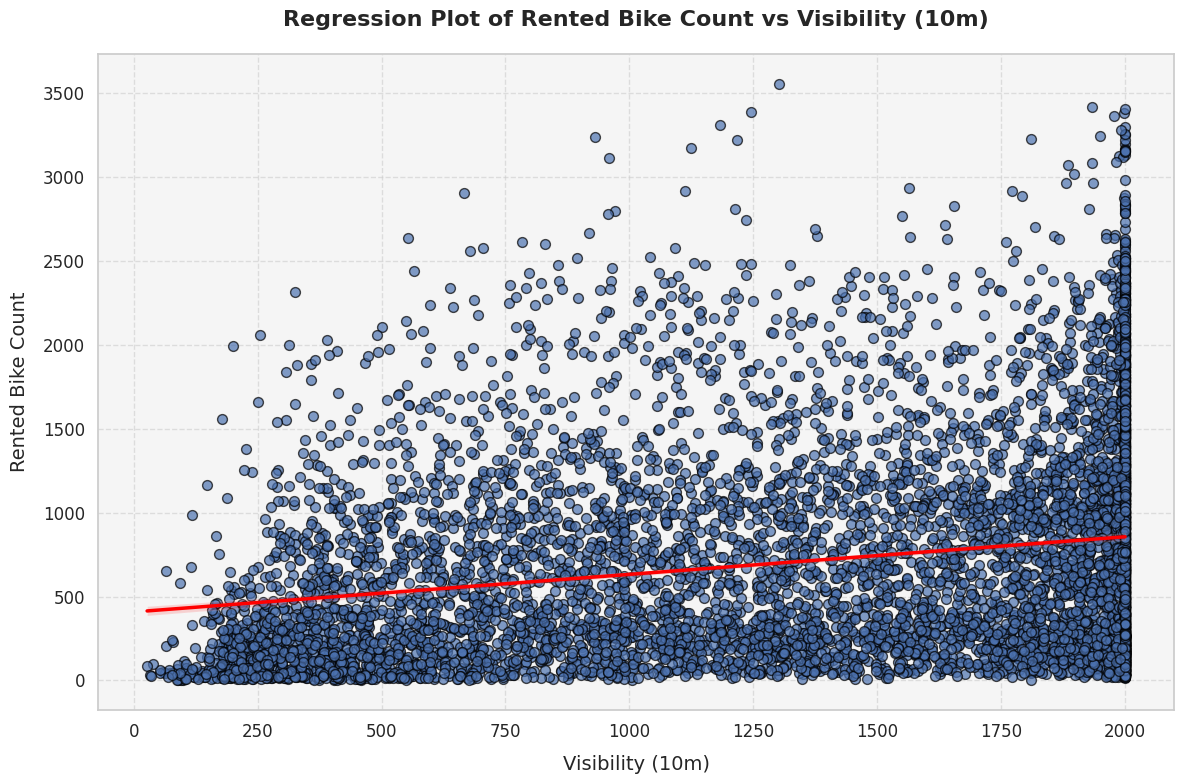

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Visibility (10m)'  # Adjust to the feature name
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Customize scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


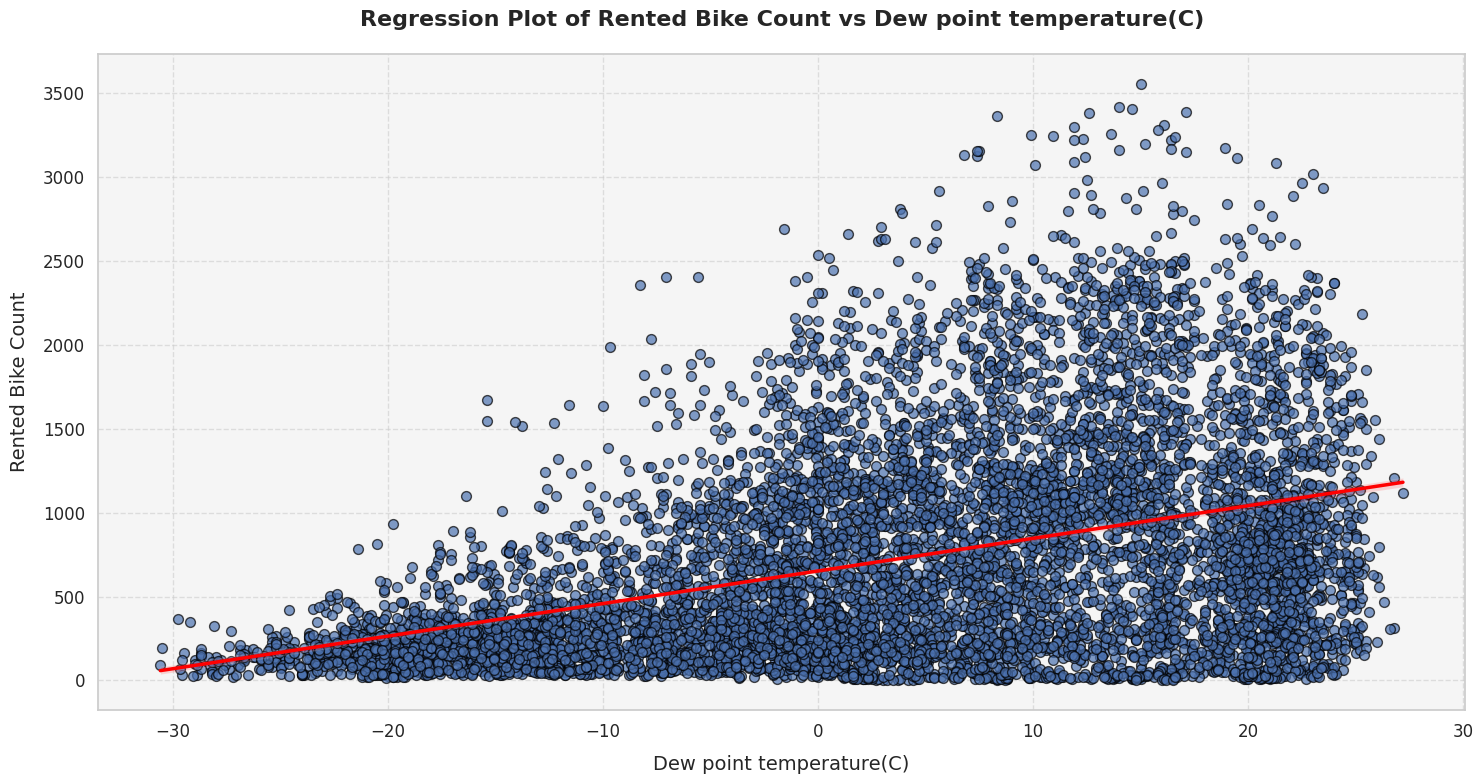

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(15, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Dew point temperature(C)'  # Adjust to the feature name
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Customize scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


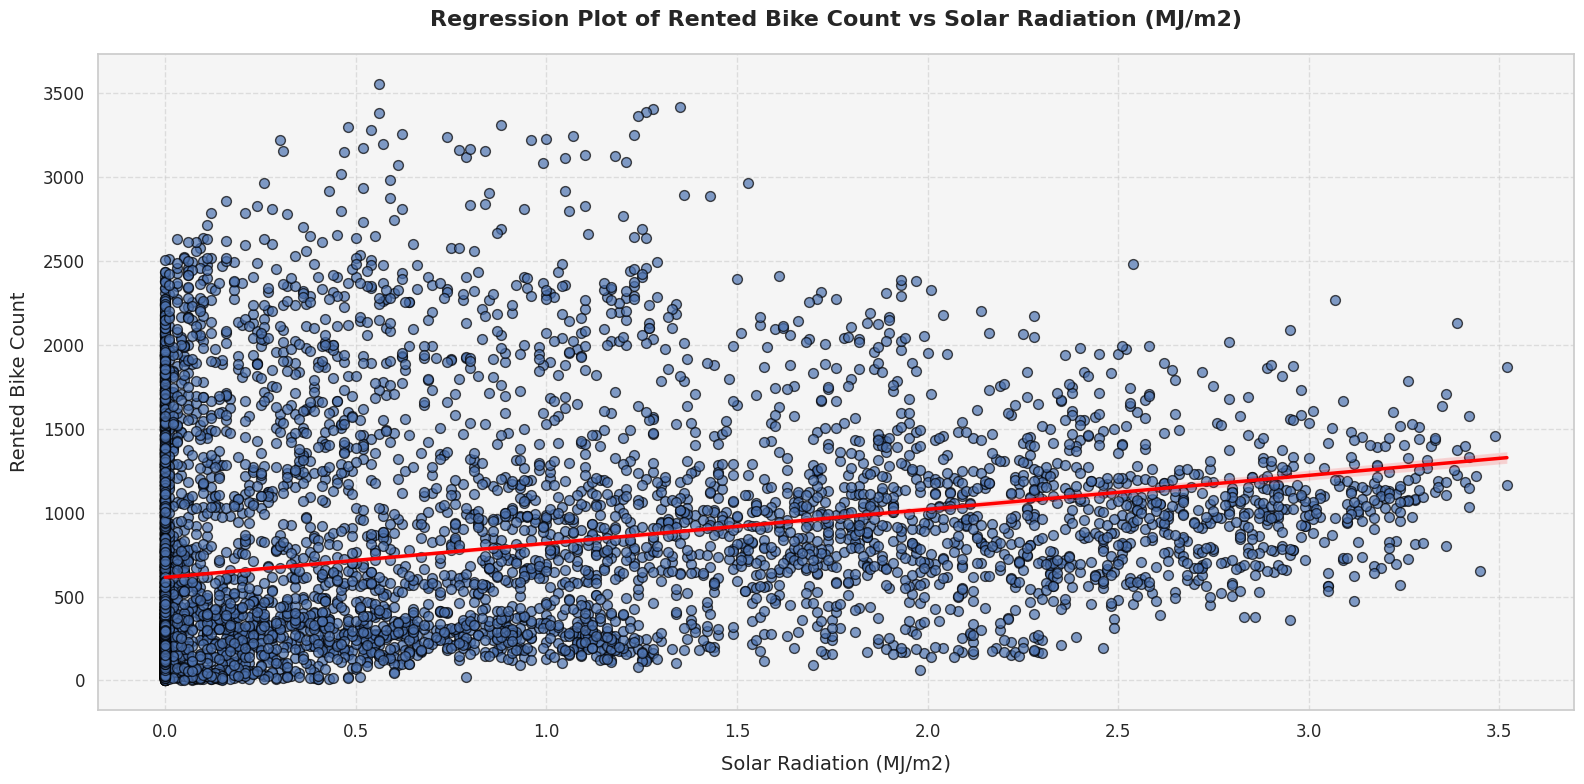

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(16, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Solar Radiation (MJ/m2)'  # Adjust to the feature name
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Customize scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


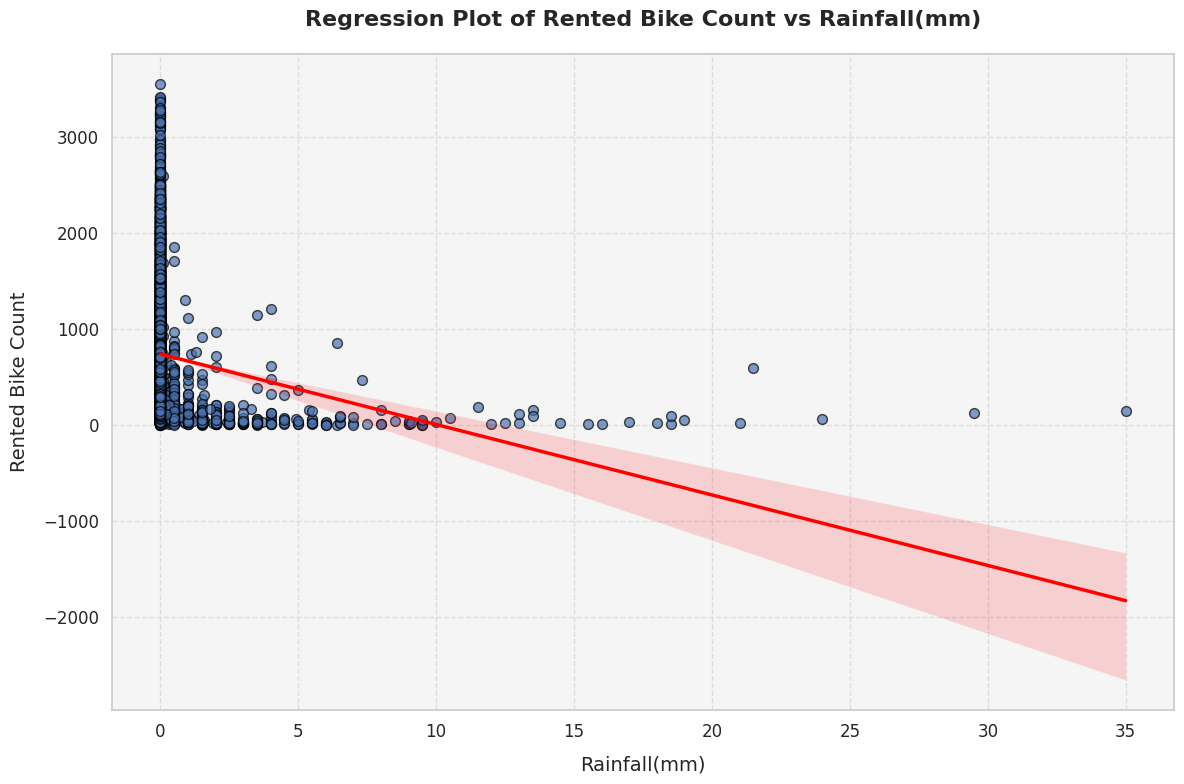

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Rainfall(mm)'  # Adjust to the feature name
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Customize scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


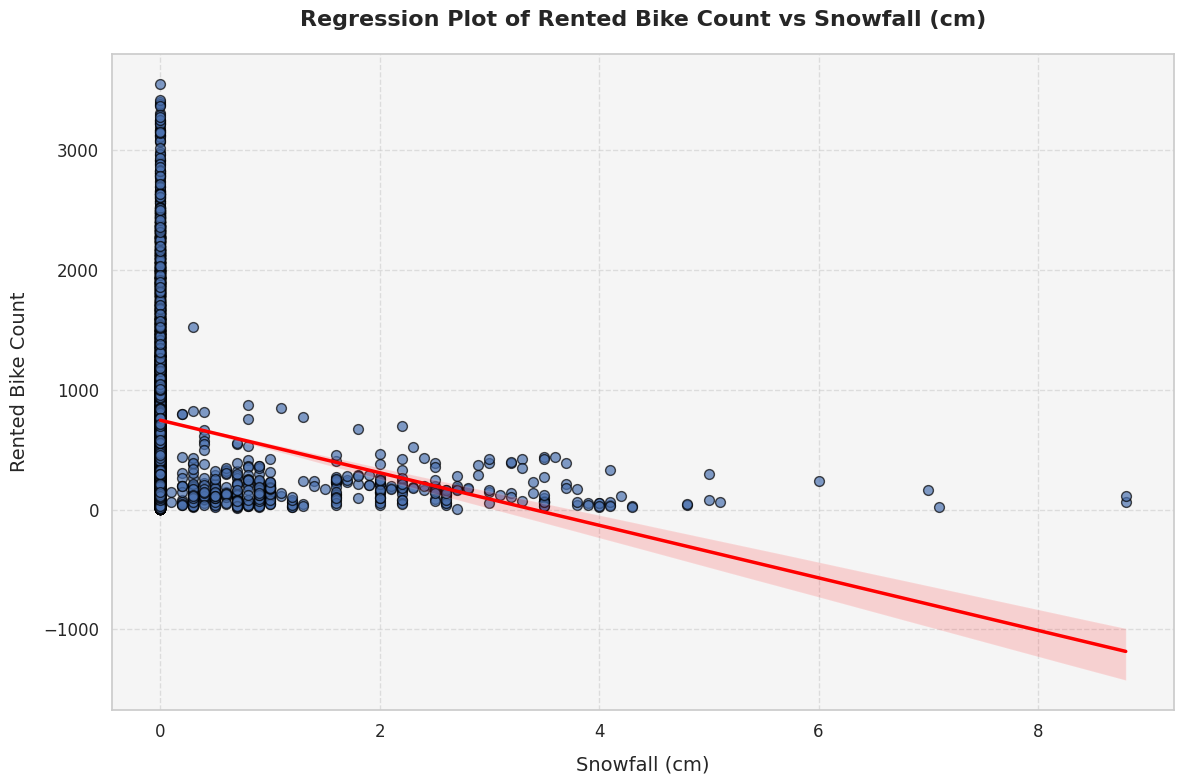

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the regression plot for the next numerical feature
next_feature = 'Snowfall (cm)'  # Adjust to the feature name
sns.regplot(
    data=df, 
    x=next_feature, 
    y='Rented Bike Count', 
    scatter_kws={'s':50, 'alpha':0.7, 'edgecolor':'black'},  # Customize scatter points
    line_kws={'color':'red', 'linewidth':2.5}  # Customize the regression line
)

# Add titles and labels
plt.title(f'Regression Plot of Rented Bike Count vs {next_feature}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(next_feature, fontsize=14, labelpad=10)
plt.ylabel('Rented Bike Count', fontsize=14, labelpad=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Add a background color to the plot area for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


In [257]:
numerical_features = ['Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

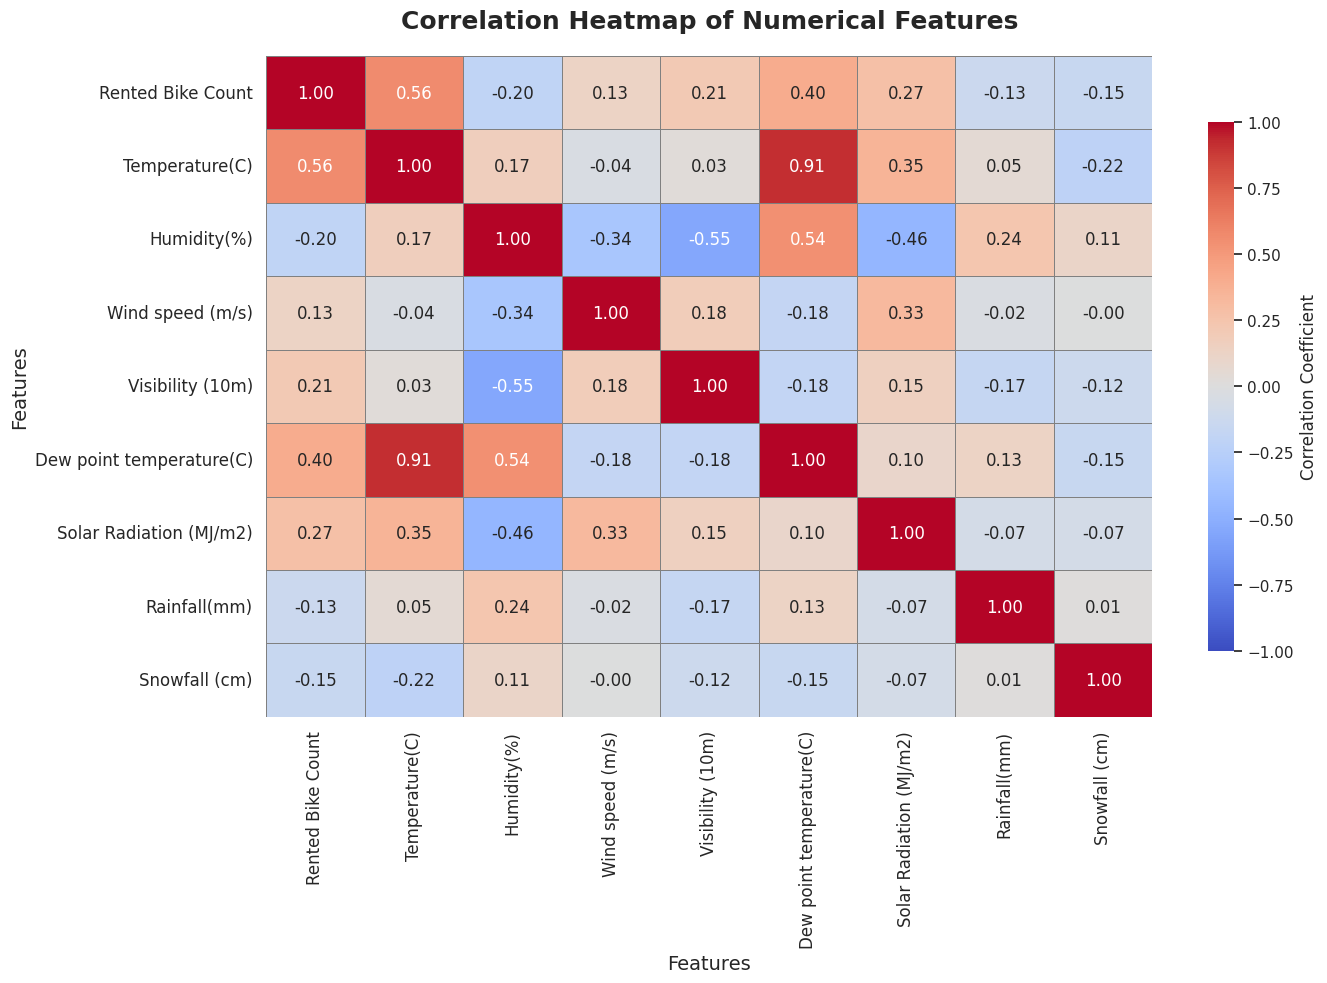

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of numerical features if not already defined
numerical_features = ['Rented Bike Count','Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

# Create the correlation matrix
corr = df[numerical_features].corr()

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(
    corr,
    cmap='coolwarm',  # Colormap
    annot=True,  # Display correlation values
    fmt=".2f",  # Format for annotation
    linewidths=0.5,  # Width of the lines separating cells
    linecolor='gray',  # Color of the lines separating cells
    vmin=-1, vmax=1,  # Range for the colormap
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}  # Colorbar properties
)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


In [261]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day of Week', 'Weekend', 'Month'],
      dtype='object')

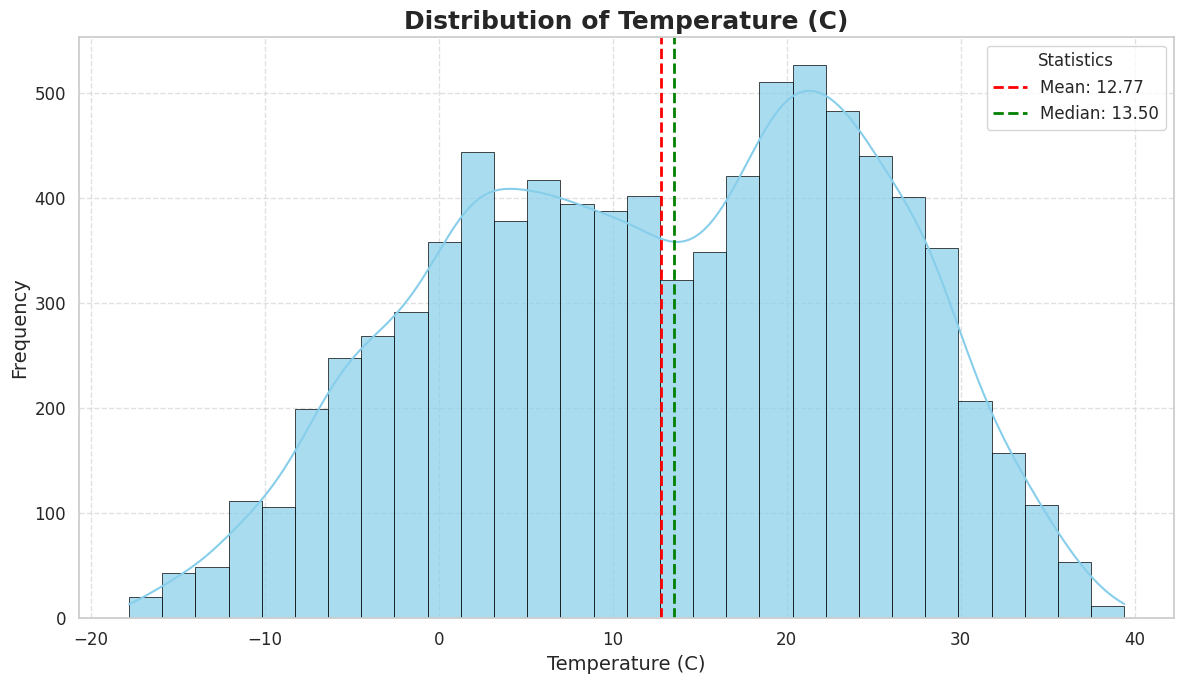

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the distribution with a KDE overlay
sns.histplot(df['Temperature(C)'], kde=True, color='skyblue', bins=30, 
             edgecolor='black', linewidth=0.5, alpha=0.7)

# Calculate mean and median
mean_value = df['Temperature(C)'].mean()
median_value = df['Temperature(C)'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Add titles and labels
plt.title('Distribution of Temperature (C)', fontsize=18, fontweight='bold')
plt.xlabel('Temperature (C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Statistics', fontsize=12)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


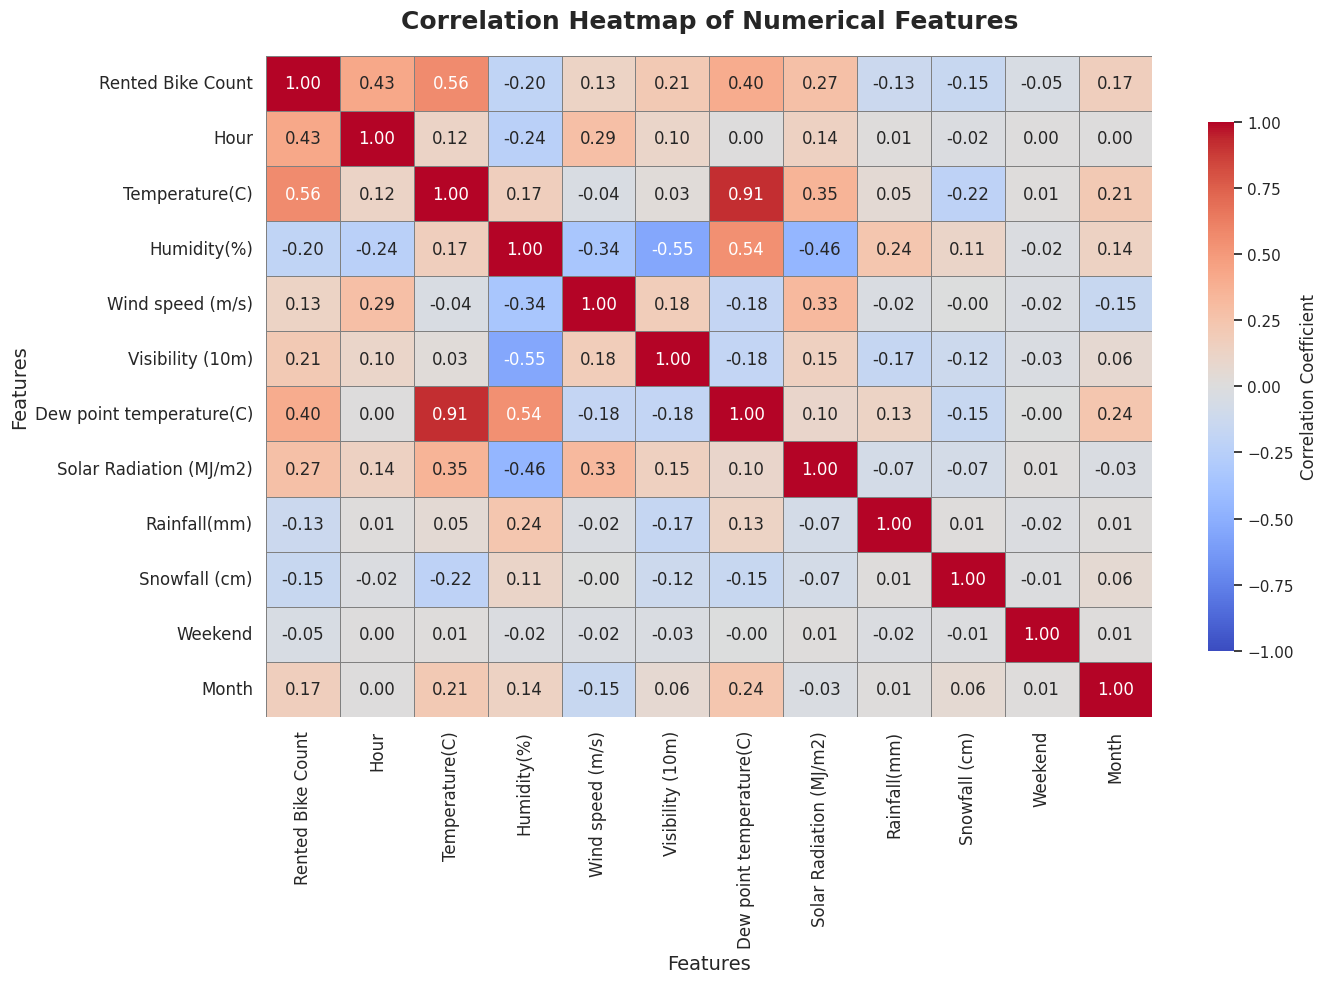

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of numerical features if not already defined
numerical_features = df.select_dtypes(include=['number']).columns

# Create the correlation matrix
corr = df[numerical_features].corr()

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(
    corr,
    cmap='coolwarm',  # Colormap
    annot=True,  # Display correlation values
    fmt=".2f",  # Format for annotation
    linewidths=0.5,  # Width of the lines separating cells
    linecolor='gray',  # Color of the lines separating cells
    vmin=-1, vmax=1,  # Range for the colormap
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}  # Colorbar properties
)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust the tick parameters for better readability
plt.tick_params(axis='both', labelsize=12)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()
